In [ ]:
!pip install econml

     |████████████████████████████████| 3.3 MB 3.6 MB/s 
     |████████████████████████████████| 356 kB 46.1 MB/s 
     |████████████████████████████████| 77 kB 3.9 MB/s 
     |████████████████████████████████| 123 kB 42.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491686 sha256=44664c480263cb31d3bf6cb41d89326aa124f42e42975221aeb630b0f468fba4
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [ ]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv')
df.head(11)

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
5,76,1,0.009607,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
6,76,1,1.743033,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
7,76,1,0.953294,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
8,76,1,2.367780,6,5,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
9,76,1,1.264409,6,4,1,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


In [ ]:
df.describe()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
count,10391.000000,10391.000000,1.039100e+04,10391.000000,10391.000000,10391.000000,10391.000000,10391.000000,10391.000000,10391.000000,10391.000000,10391.000000,10391.000000
mean,39.888846,0.325666,1.324073e-16,5.268117,5.223078,1.489943,0.630931,2.447791,-0.040457,0.054841,-0.089349,-0.045911,-0.026168
std,24.008975,0.468646,1.000000e+00,1.120765,3.982963,0.499923,0.482576,1.378420,0.969743,0.935560,0.962804,0.967262,1.010387
min,1.000000,0.000000,-3.111431e+00,1.000000,1.000000,1.000000,0.000000,0.000000,-3.088790,-3.347819,-1.575463,-1.924778,-1.805073
25%,19.000000,0.000000,-7.033152e-01,5.000000,3.000000,1.000000,0.000000,1.000000,-0.617888,-0.544506,-0.963095,-0.813799,-0.857026
50%,41.000000,0.000000,-3.449486e-02,5.000000,4.000000,1.000000,1.000000,2.000000,-0.009954,-0.022514,-0.057036,-0.159602,-0.211553
75%,62.000000,1.000000,6.724723e-01,6.000000,5.000000,2.000000,1.000000,4.000000,0.420441,0.726836,0.515392,0.596474,0.847844
max,76.000000,1.000000,3.563639e+00,7.000000,15.000000,2.000000,1.000000,4.000000,2.834589,2.171815,2.358274,2.821660,1.892348


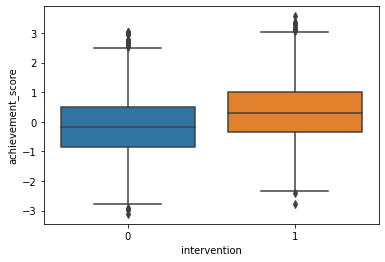

In [91]:
sns.boxplot(data=df, x='intervention', y='achievement_score')

In [93]:
df.columns.to_list()

['schoolid',
 'intervention',
 'achievement_score',
 'success_expect',
 'ethnicity',
 'gender',
 'frst_in_family',
 'school_urbanicity',
 'school_mindset',
 'school_achievement',
 'school_ethnic_minority',
 'school_poverty',
 'school_size']

## modeling


alasan mengapa saya menggunakan covariate sebagai berikut :

- success_expect : ekspetasi sukses di masa depan mempengaruhi prestasi siswa, optimis sukses bisa saja prestasi nya meningkat
- school_mindset : level pola pikir siswa mempengaruhi prestasi siswa
- frst_in_family : anak pertama di dalam keluarga yang melanjutkan ke perguruan tinggi, bisa saja anak pertama di keluarga yang kuliah, dia jadi semangat gitu belajarnya
- school_poverty : siswa yang berasal dari keluarga miskin bisa saja punya semangat yang tinggi karena balik lagi ke ekspetasi anak miskin yang bisa sukses


In [103]:
X = ['success_expect','school_mindset','frst_in_family','school_poverty']
Y = 'achievement_score'
T = 'intervention'

In [104]:
# define DML Object
dml_est = DML(
    model_y = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_t = GradientBoostingClassifier(n_estimators=100, random_state = 1000),
    model_final = LinearRegression(fit_intercept=False),
    random_state = 1000
)

In [105]:
# fit estimator to train data
np.random.seed(1000)
dml_est.fit(df[Y], T = df[T], X = df[X], inference="bootstrap")

In [106]:
dml_est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
success_expect,0.018,0.011,1.614,0.07,-0.005,0.038
school_mindset,-0.033,0.013,-2.611,0.0,-0.055,-0.007
frst_in_family,-0.019,0.025,-0.788,0.13,-0.082,0.019
school_poverty,0.021,0.014,1.558,0.01,0.006,0.054
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.181,0.064,2.836,0.0,0.071,0.317


Berdasarkan hasil tersebut kita dapat menginterpretasikan model yang significant p valuenya:
- semakin level pola pikir nya rendah maka treatment growth mindset nya positif
- begitu juga dengan level siswa dari keluarga miskin, semakin tinggi level nya maka semakin positif treatment terhadap growth mindsetnya

In [107]:
# Get treatment effect and its confidence interval
te_pred = dml_est.effect(df[X])

In [108]:
# Measure intervention effect
np.mean(te_pred)

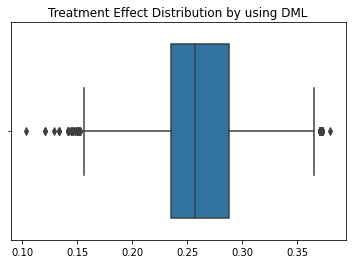

In [109]:
# check treatment effect distribution
sns.boxplot(x = te_pred).set_title("Treatment Effect Distribution by using DML");

Karena ATE positif, kita dapat mengartikan bahwa saat kita melakukan trearment growth mindset pada siwa, maka seharusnya score prestasi nya meningkat.